In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen import Generator

import numpy as np
from time import time
from matplotlib import pyplot as plt

In [3]:
G = Generator('data/rad.gaussian.in.yaml', verbose=1)

In [4]:
G.run()

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -7.82345E-05 mm -> 0 mm
   Scaling sigma_x = 1.99984 mm -> 2 mm
   Shifting avg_y = -1.09911E-05 mm -> 0 mm
   Scaling sigma_y = 1.99994 mm -> 2 mm
   Shifting avg_px = -0.0212516 eV/c -> 0 eV/c
   Scaling sigma_px = 276.849 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.0259627 eV/c -> 0 eV/c
   Scaling sigma_py = 276.844 eV/c -> 276.857 eV/c
   Shif

<ParticleGroup with 200000 particles at 0x16bfde850>

In [5]:
G['n_particle']=10_000_000

In [6]:
G.run(max_workers=10)

Creating particles in parallel with 10 workers
   Setting up workers...done.
   Executing worker tasks...done
   ParticleGroup with 10000000 particles with total charge 1.0000000000000125e-11 C


<ParticleGroup with 10000000 particles at 0x16b7c2f10>

In [7]:
n_particles = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000, 25_000_000, 50_000_000]#, 100_000_000]

In [8]:
s_times = []

for n_part in n_particles:

    G['n_particle'] = n_part

    # Run in serial:
    ts0 = time()
    G.run()
    ts1 = time()

    s_times.append(ts1-ts0)

    

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 100.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -0.0128692 mm -> 0 mm
   Scaling sigma_x = 1.98551 mm -> 2 mm
   Shifting avg_y = -0.00373924 mm -> 0 mm
   Scaling sigma_y = 1.96499 mm -> 2 mm
   Shifting avg_px = -5.75344 eV/c -> 0 eV/c
   Scaling sigma_px = 267.468 eV/c -> 276.857 eV/c
   Shifting avg_py = -6.91735 eV/c -> 0 eV/c
   Scaling sigma_py = 274.758 eV/c -> 276.857 eV/c
   Shifting avg_p

In [9]:
p_times = []

for n_part in n_particles:

    G['n_particle'] = n_part

    # Run in serial:
    ts0 = time()
    G.run(max_workers=10)
    ts1 = time()
    

    p_times.append(ts1-ts0)

Creating particles in parallel with 10 workers
   Setting up workers...done.
   Executing worker tasks...done
   ParticleGroup with 100 particles with total charge 1e-11 C
Creating particles in parallel with 10 workers
   Setting up workers...done.
   Executing worker tasks...done
   ParticleGroup with 1000 particles with total charge 1e-11 C
Creating particles in parallel with 10 workers
   Setting up workers...done.
   Executing worker tasks...done
   ParticleGroup with 10000 particles with total charge 1.0000000000000003e-11 C
Creating particles in parallel with 10 workers
   Setting up workers...done.
   Executing worker tasks...done
   ParticleGroup with 100000 particles with total charge 1.0000000000000003e-11 C
Creating particles in parallel with 10 workers
   Setting up workers...done.
   Executing worker tasks...done
   ParticleGroup with 1000000 particles with total charge 9.99999999999998e-12 C
Creating particles in parallel with 10 workers
   Setting up workers...done.
   E

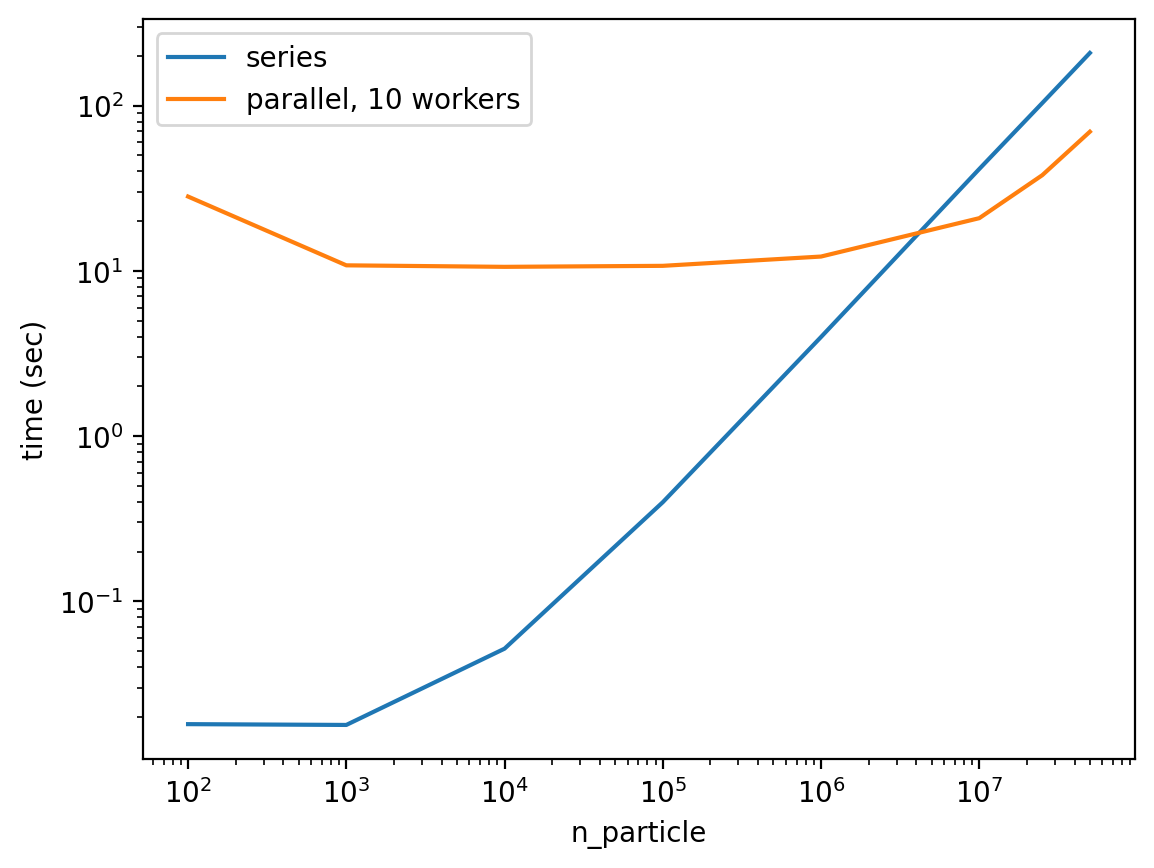

In [10]:
plt.loglog(n_particles, s_times)
plt.semilogx(n_particles, p_times)
plt.xlabel('n_particle')
plt.ylabel('time (sec)')
plt.legend(['series', 'parallel, 10 workers'])

In [11]:
G = Generator('data/rad.gaussian.in.yaml', verbose=0)
G['n_particle'] = 100

pgs = [G.run() for ii in range(10)]